{'__header__': b'MATLAB 5.0 MAT-file, Platform: Win32NT, CREATED on: Tue, 31 May 2022 10:24:37 GMT', '__version__': '1.0', '__globals__': [], 'SamplingFrequency': 2048.0, 'Data': array([-0.46096802, -0.46081543, -0.46081543, ..., -0.46310425,
       -0.46295166, -0.46310425], dtype=float32), 'Time': array([0.00000000e+00, 4.88281250e-04, 9.76562500e-04, ...,
       8.49492188e+01, 8.49497070e+01, 8.49501953e+01]), 'Description': 'AUX 2 (Channel 1) - AUX  Force', 'OTBFile': 'unknown'}
[-0.46096802 -0.46081543 -0.46081543 ... -0.46310425 -0.46295166
 -0.46310425]
[0.00000000e+00 4.88281250e-04 9.76562500e-04 ... 8.49492188e+01
 8.49497070e+01 8.49501953e+01]
[-0.46096802 -0.46081543 -0.46081543 ... -0.46310425 -0.46295166
 -0.46310425]
[0.00000000e+00 4.88281250e-04 9.76562500e-04 ... 8.49492188e+01
 8.49497070e+01 8.49501953e+01]


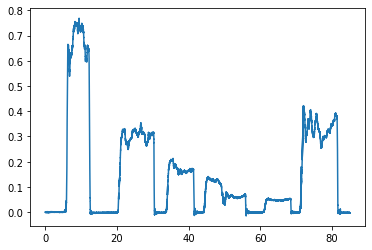

In [5]:
# Moving average, find top 3 averages which correlate with 3 MVC contractions, then second classifier: find which of 3 averages has the lowest SD, and use this as average MVC

import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.signal as signal

# Load data
forcedata = sio.loadmat("C:\\Users\\danie\\Documents\\forcedata.mat", squeeze_me=True)
print(forcedata)

# Check shape of data
data = forcedata['Data'].shape
#print(data)
time = forcedata['Time'].shape
#print(time)

print(forcedata['Data'])
print(forcedata['Time'])

# Define variables
force = forcedata['Data']
time = forcedata['Time']

print(force)
print(time)

# Plot graph
force = force-force[0]
plt.plot(time,force)

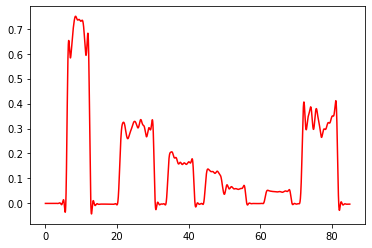

In [2]:
# Filter with butterworth
sos = signal.butter(5, 1, 'LP', fs=2048, output='sos')
filtered = signal.sosfiltfilt(sos, force)

#plt.plot(time, force)
plt.plot(time, filtered, 'r-')

[ 11734  41597  69269  90823 125493 145751]
11734
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 25869  62632  85290 114681 140446 167531]


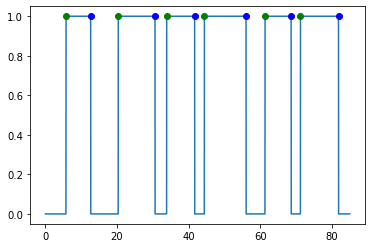

In [3]:
# Autodefine start and end of contractions

threshold = 0.02
plt.plot(time, filtered > threshold)
blocks = (filtered > threshold).astype(int)
diffs = np.diff(blocks)
starts = np.where(diffs == 1)[0]
print(starts)
print(starts[0])
print(diffs[11800:11900])
ends = np.where(diffs == -1)[0]
print(ends)
plt.plot(time[starts], np.ones_like(starts), 'go')
plt.plot(time[ends], np.ones_like(ends), 'bo')

In [4]:
# define a list of moving averages
for start, end in zip(starts, ends):
    this_block = force[start:end]
    
    # Convert array to df
    my_array = np.array(force)
    df = pd.DataFrame(my_array, columns = ['MeanForce'])
    #print(df)
    #print(type(df))
    
    # apply moving average
    s = df
    movav = s.rolling(3).mean().values.flatten()
    
    # apply moving SD
    movsd = s.rolling(3).std().values.flatten()
    
    # find indices of 3 max moving averages
    
    
    # extract 3 max moving averages
    notnans = ~np.isnan(movav)
    # print(movav[notnans])
    big3 = np.argsort(movav[notnans])[-3:]
    print(movav[notnans][big3])
    
    # extract SD of 3 max moving averages
    print(movsd[notnans][big3])
    
    # pick and store in list, 1-of-3-max moving average with lowest SD
    minsd = np.argmin(movsd[notnans][big3])
    print(minsd) # index of min sd
    
    avg_list = [] # list of top 3 max averages with min sds from all 3 contractions
    
    
# average across list of moving averages
from numpy import mean

avg_mvc = mean(avg_list)
print(avg_mvc)

[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
[0.76822917 0.76833089 0.76848348]
[4.90501443e-04 1.76193319e-04 8.80966597e-05]
2
nan


C:\Users\danie\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\danie\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
rands = np.random.randint(20, size=10)
print(rands)
print(rands[np.argsort(rands)[-3::]])

In [ ]:
# Convert array to df

my_array1 = np.array(force)
df1 = pd.DataFrame(my_array, columns = ['MeanForce'])

print(df1)
print(type(df1))

In [ ]:
s = df1
movav = s.rolling(3).mean().values.flatten()
movsd = s.rolling(3).std().values.flatten()

In [ ]:
notnans = ~np.isnan(movav)
print(movav[notnans])
big3 = np.argsort(movav[notnans])[-3:]
print(movav[notnans][big3])
print(movsd[notnans][big3])

In [ ]:
# Calculate rolling standard deviation

s = df1
s.rolling(3).std()

In [ ]:
# Convery to df

my_array2 = np.array(s)

df2 = pd.DataFrame(my_array, columns = ['SD'])
df2['Mean'] = movav
print(df2)
print(type(df2))